# Werlabs task report

I decided to use badteeth dataset.
https://www.kaggle.com/angelmm/healthteethsugar

It looks natural to establish cohorts based on the literacy level.
We will see how those cohorts behave when consider sugar consumption.
According to the already done analysis
https://www.kaggle.com/bengin/d/angelmm/healthteethsugar/regression-and-visualization
there is a pretty strong positive correlation between average literacy and sugar consumption.

After cohort analysis, we will try to form a hypothesis aimed to explain the observed cohorts behaviour.
Following the logic, we collect the data, which can help to prove of reject the hypothesis.
Finally we collect test statistics and test the hypothesis, setting the pi-value to some predefined quantity.



In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

#pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

In [126]:
literacy = pd.read_csv("data/adultliteracy.csv")
literacy.rename(columns={"Adult..15...literacy.rate......Total":"Country"}, inplace=True)
#drop rows with no data
literacy.dropna(how="all", subset = list(literacy.columns)[1:], inplace=True)
literacy.head()


,Country,X1975,X1976,X1977,X1978,X1979,X1980,X1981,X1982,X1983,X1984,X1985,X1986,X1987,X1988,X1989,X1990,X1991,X1992,X1993,
0,Afghanistan,NaN,NaN,NaN,NaN,18.157681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
1,Albania,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
2,Algeria,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,49.630885,NaN,NaN,NaN,NaN,NaN,NaN,...
4,Angola,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
5,Anguilla,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95.407098,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...


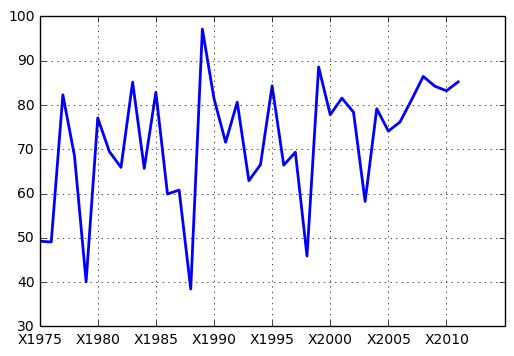

In [127]:
literacy_mean = literacy.mean(axis=0,numeric_only=True)
literacy_mean
#literacy
literacy_mean.plot()

In [128]:
literacy.set_index(literacy.Country, inplace=True)
#calculate average literacy for each country
literacy['mean'] = literacy.mean(axis=1)
#calculate the number of points for the literacy average.
literacy['points'] = literacy.count(axis=1)-2
#making cohorts,based on the average literacy. 
#there are 10 cohorts
literacy['cohort'] = np.floor(literacy['mean']/10)
# sorting literacy table by mean of literacy
literacy.sort('mean', ascending=False,inplace=True)#['mean']
#removing rows for means calculated for too few datapoints
#here we drop country, if it has less then  3 entries for the observation period
literacy.drop(literacy[literacy.points < 3].index, inplace=True)
#creating new table with chosen columns
prepared_literacy = literacy[['mean',  'points','cohort']]
prepared_literacy.head()

,mean,points,cohort
Country,,,
Estonia,99.763509,3,9
Latvia,99.661037,3,9
Slovenia,99.623989,3,9
Azerbaijan,99.384517,3,9
Poland,99.373388,4,9


In [129]:
#grouping countries by cohort
grouped_by_cohort = prepared_literacy.groupby(['cohort'])
grouped_by_cohort.head(10)

mean  points  cohort
cohort Country                                         
9      Estonia                99.763509       3       9
       Latvia                 99.661037       3       9
       Slovenia               99.623989       3       9
       Azerbaijan             99.384517       3       9
       Poland                 99.373388       4       9
       Lithuania              99.263524       3       9
       Armenia                99.240097       3       9
       Tonga                  99.172096       3       9
       Cuba                   99.159992       3       9
       Russia                 99.037096       3       9
8      Qatar                  89.420013       7       8
       Malta                  89.404653       3       8
       Puerto Rico            89.313081       4       8
       Vietnam                89.043258       5       8
       Seychelles             88.928323       4       8
       Brunei                 88.439129       4       8
       Jordan                 88.079159       6       8
       Ecuador                87.810872       7       8
       Portugal               87.605859       3       8
       Brazil                 87.488682       8       8
7      Namibia                79.114820       3       7
       Botswana               78.286823       3       7
       Libya                  78.257986       4       7
       Cape Verde             75.908413       3       7
       Syria                  75.861303       4       7
       Cambodia               73.107888       4       7
       Swaziland              73.017355       4       7
       United Arab Emirates   71.594674       3       7
       Vanuatu                71.333182       5       7
       Sao Tome and Principe  71.252894       4       7
6      Guatemala              69.723543       3       6
       Iran                   69.277636       8       6
       Tunisia                69.267103       6       6
       Laos                   67.817776       4       6
       Uganda                 67.208729       4       6
       Zambia                 65.894390       4       6
       Tanzania               65.448468       3       6
       Algeria                64.051021       3       6
       Comoros                63.982749       3       6
       Cameroon               62.898954       4       6
5      Malawi                 57.993543       3       5
       Togo                   56.892323       4       5
       Rwanda                 56.709445       4       5
       India                  55.101834       5       5
       Nigeria                53.765864       3       5
       Yemen, Rep.            52.365825       3       5
       Burundi                51.536191       4       5
       Morocco                50.412320       6       5
4      Timor-Leste            48.836328       3       4
       Haiti                  47.387873       3       4
       Pakistan               47.144727       6       4
       Cote d'Ivoire          44.024448       4       4
       Liberia                43.321710       4       4
       Bangladesh             42.441705       4       4
       Mozambique             41.138077       4       4
3      Nepal                  39.881833       4       3
       Central African Rep.   39.779691       4       3
       Senegal                39.432595       4       3
       Guinea-Bissau          38.863732       3       3
       Ethiopia               32.931919       4       3
                                    ...     ...     ...

[65 rows x 3 columns]

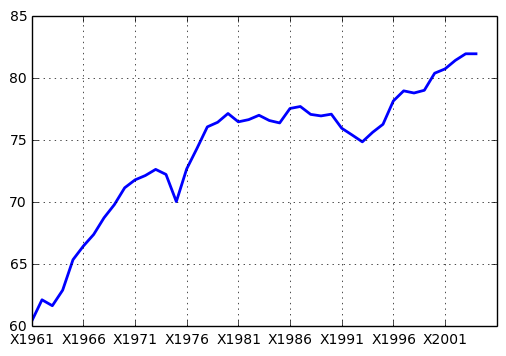

In [130]:
sugar = pd.read_csv('data/sugar_consumption.csv')
sugar.rename(columns = {"NA.":"Country"}, inplace = True)
sugar.dropna(how="all", subset = list(sugar.columns)[1:], inplace=True)
sugar.set_index(sugar.Country, inplace=True)

#get average over all countries for each year
sugar_mean = sugar.mean(axis=0)
sugar_mean.plot()


One can see that on average Earth's population increases sugars consumption.

In [131]:
sugar['cohort'] = prepared_literacy['cohort']
#drop rows with NaN cohort(with no average for literacy)
sugar=sugar[sugar.cohort >1]#.index
sugar[['Country', 'cohort']].head(10)

,Country,cohort
Country,,
Albania,Albania,9
Algeria,Algeria,6
Argentina,Argentina,9
Armenia,Armenia,9
Azerbaijan,Azerbaijan,9
Bangladesh,Bangladesh,4
Belarus,Belarus,9
Benin,Benin,2
Bolivia,Bolivia,8


In [132]:
#grouping 'sugar' table by cohorts
grouped_by_cohort = sugar.sort('cohort').groupby("cohort", axis=0)

grouped_by_cohort.head(10)

Country   X1961   X1962   X1963  \
cohort Country                                                                
2      Chad                                    Chad   13.70   13.70   16.44   
       Benin                                  Benin    5.48    8.22    8.22   
       Mali                                    Mali    8.22   16.44    8.22   
       Guinea                                Guinea    8.22   10.96    8.22   
3      Ethiopia                            Ethiopia    5.48    5.48    5.48   
       Nepal                                  Nepal    0.00    0.00    2.74   
       Senegal                              Senegal   52.06   54.80   54.80   
       Guinea-Bissau                  Guinea-Bissau    2.74    2.74    5.48   
       Central African Rep.    Central African Rep.    5.48    8.22    8.22   
4      Haiti                                  Haiti   65.75   65.75   65.75   
       Timor-Leste                      Timor-Leste    0.00    0.00    0.00   
       Pakistan                            Pakistan   52.06   60.27   76.71   
       Mozambique                        Mozambique   16.44   16.44   19.18   
       Bangladesh                        Bangladesh   24.66   27.40   27.40   
       Liberia                              Liberia    2.74    5.48    5.48   
       Cote d'Ivoire                  Cote d'Ivoire   19.18   19.18   16.44   
5      Togo                                    Togo    5.48   10.96    5.48   
       Nigeria                              Nigeria    2.74    5.48    2.74   
       Rwanda                                Rwanda    0.00    0.00    0.00   
       Burundi                              Burundi    0.00    0.00    0.00   
       India                                  India   52.06   49.32   49.32   
       Malawi                                Malawi    5.48    8.22    8.22   
       Yemen, Rep.                      Yemen, Rep.   27.40   30.14   24.66   
       Morocco                              Morocco   79.45   84.93   79.45   
6      Iran                                    Iran   63.01   63.01   63.01   
       Guatemala                          Guatemala   60.27   65.75   63.01   
       Tanzania                            Tanzania   16.44   19.18   16.44   
       Laos                                    Laos    0.00    2.74    0.00   
       Tunisia                              Tunisia   60.27   60.27   60.27   
       Zambia                                Zambia   16.44   13.70   13.70   
       Algeria                              Algeria   46.58   49.32   46.58   
       Egypt                                  Egypt   32.88   35.62   35.62   
       Uganda                                Uganda   27.40   30.14   32.88   
       Comoros                              Comoros    5.48    5.48    8.22   
7      Sao Tome and Principe  Sao Tome and Principe   35.62   35.62   35.62   
       Botswana                            Botswana   46.58   43.84   43.84   
       Cambodia                            Cambodia   27.40   27.40   24.66   
       Cape Verde                        Cape Verde   41.10   41.10   38.36   
       Vanuatu                              Vanuatu   35.62   43.84   32.88   
       United Arab Emirates    United Arab Emirates   95.89   98.63   95.89   
       Libya                                  Libya   60.27   60.27   60.27   
       Syria                                  Syria   46.58   46.58   46.58   
       Namibia                              Namibia   73.97   76.71   79.45   
       Swaziland                          Swaziland   76.71   76.71   79.45   
8      Saudi Arabia                    Saudi Arabia   16.44   16.44   27.40   
       Portugal                            Portugal   49.32   49.32   46.58   
       Myanmar                              Myanmar   13.70   13.70   16.44   
       Seychelles                        Seychelles   84.93   71.23   63.01   
       Peru                                    Peru   76.71   79.45   82.19   
       Malta   

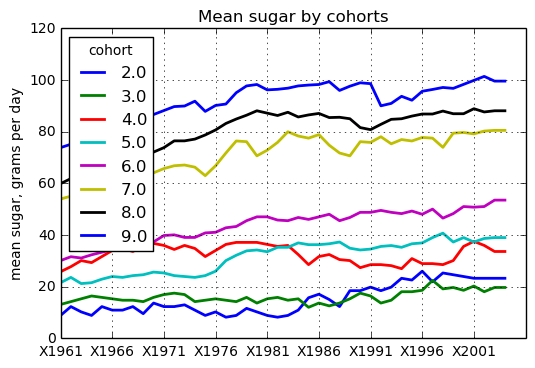

In [133]:
#making plot for each cohort
# averaging for each cohort i.e. over all countries in cohort
grouped_by_cohort.mean().T.plot()
plt.title('Mean sugar by cohorts')
plt.ylabel('mean sugar, grams per day');


One can see that all cohorts reveal on average increasing sugar consumption. 
Lets look at the same plot, but normalized on the 1961, so one would be able to compare all the cohorts.

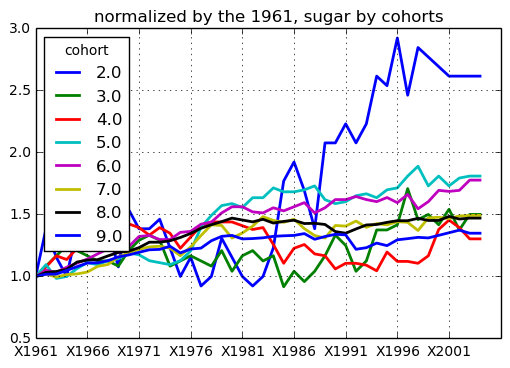

In [134]:
mean_grouped_by_cohort=grouped_by_cohort.mean()
X1961= mean_grouped_by_cohort['X1961']
# the same plot, but normalized by the data for 1961.
mean_grouped_by_cohort.divide(X1961, axis=0).T.plot()
plt.title('normalized by the 1961, sugar by cohorts')


Here we can see that for the cohort 2, that is the set of countries with the lowest reported literacy, the sugar consumption raised significantly starting from middle 80th...

Why is it so?
One possible reason is that the economics of cohort 2 countries raised in more than 2 times since the middle 80th. So people could afford to consume more sugars.

Another reason could be the massive humanitarian reliefs for mostly African countries...

Since we have data for GDP we can try to create statistics, make a hypotesis, and try to prove it. 
The null-hypothesis (H_0) will be that cohort 2 countries did not improve their economics so much to be able to afford to double sugar consumption.
If the H_0 will fail, one of the other possible alternative hypothesis could be massive
humanitarian reliefs, what is mainly food and other necessary items.


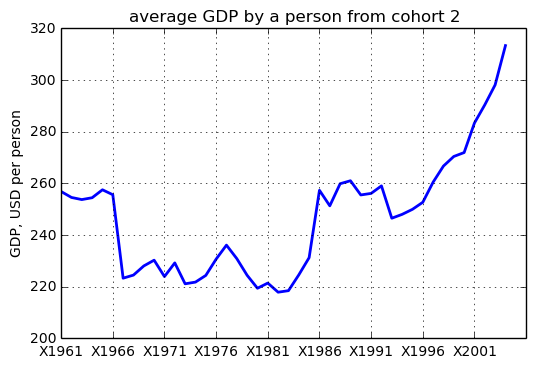

In [135]:
GDP = pd.read_csv("data/gdp.csv")
GDP.rename(index = str, columns={"Income.per.person..fixed.2000.US..":"Country"}, inplace=True)
GDP.dropna(how="all", subset = list(GDP.columns)[1:], inplace=True)
GDP.set_index(GDP.Country, inplace=True)
#selecting list of cohort 2 countries from the previous 
#'grouped_by_cohort' table
cohort_2_countries = grouped_by_cohort.Country.groups[2]
#cohort_2_countries
GDP_2=GDP.T[cohort_2_countries]
#selecting years from 1961 to 2004 to match the years for sugars 
GDP_2['X1961':'X2004'].T.mean().plot()
plt.title('average GDP by a person from cohort 2')
plt.ylabel('GDP, USD per person');


Here we can see that indeed, since middle 80th the GPD raised on 25-30%.
Could it be the reason for the increased sugar consumption? :)

In order to answer this question we need to establish a connection between the change of GDP and the change of sugar consumption. 
There are many ways how one can do it. Here I chose to use cohort 9. That cohort contains counties with the over 90% literacy,  mainly European countries, America, former USSR. 
This cohort is strong, providing enough data and those countries were quite steady developing since the World War. 

We start with extracting the data for GDP and sugars for cohort 9.

In [136]:
# get the list of cohort9 countries
cohort_9_countries = grouped_by_cohort.Country.groups[9]
cohort_9_countries
GDP_9=GDP.T[cohort_9_countries]
#slice the GDP data from 1961 to 2004
GDP_9= GDP_9['X1961':'X2004']
GDP_9.head()


Country,Trinidad and Tobago,Sri Lanka,Tajikistan,Uruguay,Suriname,Spain,Slovenia,Thailand,Venezuela,West Bank and Gaza,Albania,Russia,Argentina,Armenia,Azerbaijan,Belarus,Chile,Colombia,Costa Rica,Croatia,
X1961,3744.356,277.6427,NaN,4231.3,NaN,4112.065,NaN,328.0574,5403.436,NaN,NaN,NaN,5448.304,NaN,NaN,NaN,1867.609,1214.201,1719.663,NaN,...
X1962,3799.697,280.6528,NaN,4113.191,NaN,4479.949,NaN,342.2937,5650.189,NaN,NaN,NaN,5316.579,NaN,NaN,NaN,1915.333,1243.084,1795.493,NaN,...
X1963,3975.402,283.9368,NaN,4071.376,NaN,4866.994,NaN,358.594,5660.02,NaN,NaN,NaN,4956.217,NaN,NaN,NaN,1982.23,1241.813,1817.026,NaN,...
X1964,4238.361,286.3427,NaN,4123.413,NaN,5074.681,NaN,371.5917,6070.145,NaN,NaN,NaN,5375.464,NaN,NaN,NaN,1986.327,1285.297,1829.667,NaN,...
X1965,4217.635,286.7429,NaN,4121.473,NaN,5333.775,NaN,389.9389,6108.348,NaN,NaN,NaN,5855.612,NaN,NaN,NaN,1948.832,1285.785,1945.902,NaN,...


In [137]:
sugar_9=sugar.T[cohort_9_countries]
sugar_9 = sugar_9['X1961':'X2004']
sugar_9.head(10)

Country,Trinidad and Tobago,Sri Lanka,Tajikistan,Uruguay,Suriname,Spain,Slovenia,Thailand,Venezuela,West Bank and Gaza,Albania,Russia,Argentina,Armenia,Azerbaijan,Belarus,Chile,Colombia,Costa Rica,Croatia,
X1961,101.37,49.32,NaN,104.11,79.45,54.8,NaN,10.96,98.63,NaN,30.14,NaN,106.85,NaN,NaN,NaN,73.97,147.95,120.55,NaN,...
X1962,106.85,49.32,NaN,109.59,82.19,63.01,NaN,10.96,95.89,NaN,30.14,NaN,98.63,NaN,NaN,NaN,95.89,139.73,120.55,NaN,...
X1963,112.33,49.32,NaN,98.63,82.19,54.8,NaN,10.96,98.63,NaN,32.88,NaN,73.97,NaN,NaN,NaN,98.63,136.99,117.81,NaN,...
X1964,104.11,52.06,NaN,106.85,76.71,60.27,NaN,10.96,101.37,NaN,35.62,NaN,109.59,NaN,NaN,NaN,87.67,128.77,128.77,NaN,...
X1965,112.33,54.8,NaN,106.85,84.93,63.01,NaN,19.18,104.11,NaN,35.62,NaN,101.37,NaN,NaN,NaN,82.19,123.29,123.29,NaN,...
X1966,123.29,65.75,NaN,104.11,87.67,65.75,NaN,16.44,101.37,NaN,35.62,NaN,106.85,NaN,NaN,NaN,98.63,120.55,128.77,NaN,...
X1967,120.55,65.75,NaN,98.63,93.15,76.71,NaN,19.18,101.37,NaN,38.36,NaN,109.59,NaN,NaN,NaN,101.37,112.33,120.55,NaN,...
X1968,120.55,65.75,NaN,93.15,84.93,71.23,NaN,16.44,101.37,NaN,38.36,NaN,106.85,NaN,NaN,NaN,106.85,115.07,131.51,NaN,...
X1969,115.07,68.49,NaN,104.11,90.41,73.97,NaN,21.92,106.85,NaN,38.36,NaN,106.85,NaN,NaN,NaN,101.37,115.07,131.51,NaN,...
X1970,112.33,68.49,NaN,104.11,87.67,79.45,NaN,21.92,106.85,NaN,38.36,NaN,117.81,NaN,NaN,NaN,101.37,109.59,142.47,NaN,...


Now for each of ``sugar_9`` and ``GDP_9`` tables we calculate the _differences_ for sugar and GDP for each country in the cohort for each year.
 I.e. for *Trinidad and Tobago* for ``sugar_9`` table the cell ``X1962`` will contain ``106.85-101.37=5.48``.
 
For ``GDP_9`` table for the same year for *Trinidad and Tobago*  it will be `` 3799.697- 3744.356= 55.351``.

In [138]:
sugar_9_diff = sugar_9.diff()#.merge(sugar_9.diff(), how='inner')
#badteeth.merge(literacy,on='Country', how = "inner")
sugar_9_diff['year'] = sugar_9_diff.index

sugar_9_diff.head()

Country,Trinidad and Tobago,Sri Lanka,Tajikistan,Uruguay,Suriname,Spain,Slovenia,Thailand,Venezuela,West Bank and Gaza,Albania,Russia,Argentina,Armenia,Azerbaijan,Belarus,Chile,Colombia,Costa Rica,Croatia,
X1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
X1962,5.48,0,NaN,5.48,2.74,8.21,NaN,0,-2.74,NaN,0,NaN,-8.22,NaN,NaN,NaN,21.92,-8.22,0,NaN,...
X1963,5.48,0,NaN,-10.96,0,-8.21,NaN,0,2.74,NaN,2.74,NaN,-24.66,NaN,NaN,NaN,2.74,-2.74,-2.74,NaN,...
X1964,-8.22,2.74,NaN,8.22,-5.48,5.47,NaN,0,2.74,NaN,2.74,NaN,35.62,NaN,NaN,NaN,-10.96,-8.22,10.96,NaN,...
X1965,8.22,2.74,NaN,0,8.22,2.74,NaN,8.22,2.74,NaN,0,NaN,-8.22,NaN,NaN,NaN,-5.48,-5.48,-5.48,NaN,...


In [139]:
GDP_9_diff = GDP_9.diff()
GDP_9_diff['year'] = GDP_9_diff.index
GDP_9_diff.head()

Country,Trinidad and Tobago,Sri Lanka,Tajikistan,Uruguay,Suriname,Spain,Slovenia,Thailand,Venezuela,West Bank and Gaza,Albania,Russia,Argentina,Armenia,Azerbaijan,Belarus,Chile,Colombia,Costa Rica,Croatia,
X1961,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...
X1962,55.34054,3.010022,NaN,-118.1089,NaN,367.8846,NaN,14.23623,246.7528,NaN,NaN,NaN,-131.7247,NaN,NaN,NaN,47.72361,28.8828,75.83019,NaN,...
X1963,175.7054,3.284026,NaN,-41.8158,NaN,387.0449,NaN,16.30034,9.831401,NaN,NaN,NaN,-360.3624,NaN,NaN,NaN,66.89771,-1.270896,21.53329,NaN,...
X1964,262.9589,2.405889,NaN,52.03772,NaN,207.6866,NaN,12.99769,410.1249,NaN,NaN,NaN,419.2472,NaN,NaN,NaN,4.096602,43.48417,12.64047,NaN,...
X1965,-20.72607,0.4002541,NaN,-1.940865,NaN,259.0945,NaN,18.34723,38.20335,NaN,NaN,NaN,480.1479,NaN,NaN,NaN,-37.49518,0.4879153,116.2348,NaN,...


Now we concatenate the tables and group them by year.

In [140]:
concat = pd.concat([sugar_9_diff, GDP_9_diff])
#concat.reset_index(inplace=True)
concat = concat.sort('year').groupby('year',axis=0)
concat.head()

Country     Trinidad and Tobago  Sri Lanka Tajikistan   Uruguay  Suriname  \
year                                                                        
X1961 X1961                 NaN        NaN        NaN       NaN       NaN   
      X1961                 NaN        NaN        NaN       NaN       NaN   
X1962 X1962                5.48          0        NaN      5.48      2.74   
      X1962            55.34054   3.010022        NaN -118.1089       NaN   
X1963 X1963                5.48          0        NaN    -10.96         0   
      X1963            175.7054   3.284026        NaN  -41.8158       NaN   
X1964 X1964               -8.22       2.74        NaN      8.22     -5.48   
      X1964            262.9589   2.405889        NaN  52.03772       NaN   
X1965 X1965                8.22       2.74        NaN         0      8.22   
      X1965           -20.72607  0.4002541        NaN -1.940865       NaN   
X1966 X1966               10.96      10.95        NaN     -2.74      2.74   
      X1966               106.2    7.16561        NaN  82.03554       NaN   
X1967 X1967               -2.74          0        NaN     -5.48      5.48   
      X1967            13.72915   11.86782        NaN -193.7928       NaN   
X1968 X1968                   0          0        NaN     -5.48     -8.22   
      X1968            146.1924   9.941895        NaN   39.4112       NaN   
X1969 X1969               -5.48       2.74        NaN     10.96      5.48   
      X1969            48.34402    17.1465        NaN  206.3841       NaN   
X1970 X1970               -2.74          0        NaN         0     -2.74   
      X1970            97.65791   5.566976        NaN  76.43498       NaN   
X1971 X1971                5.48      -5.48        NaN     -8.22         0   
      X1971           0.2171697 -0.3321483        NaN -23.87828       NaN   
X1972 X1972               -5.48     -10.95        NaN      8.22     -2.74   
      X1972            228.5243  -5.864755        NaN -61.60597       NaN   
X1973 X1973                13.7      -8.22        NaN     -8.22         0   
      X1973            46.63345   17.19801        NaN  10.73089       NaN   
X1974 X1974               -2.74     -24.66        NaN      13.7         0   
      X1974            149.5739   8.166572        NaN   120.221       NaN   
X1975 X1975               -5.48      -8.22        NaN    -10.96      2.74   
      X1975            29.10423    15.9459        NaN  256.9317       NaN   
X1976 X1976                5.48       2.74        NaN     10.96    -10.96   
      X1976              268.39   6.239087        NaN  163.3748 -73.00365   
X1977 X1977               -2.74       8.22        NaN    -21.92         0   
      X1977            418.6374    12.9296        NaN  43.23489  249.2544   
X1978 X1978                2.74      16.44        NaN      2.74     24.66   
      X1978            493.5976   14.95186        NaN  226.8096  193.7335   
X1979 X1979                13.7       13.7        NaN      13.7      8.22   
      X1979            130.4379   17.65263        NaN  277.0035 -175.3075   
X1980 X1980               19.17      -5.48        NaN    -10.96     16.44   
      X1980            552.7812   16.46931        NaN  274.0806 -148.1908   
X1981 X1981               -5.47      -2.74        NaN      5.48    -35.62   
      X1981            193.0565   22.03459        NaN  50.24423 -3.870324   
X1982 X1982               -13.7      -2.74        NaN     -8.22      5.48   
      X1982            152.6123   8.115657        NaN -586.4686 -55.03738   
X1983 X1983                2.74       8.22        NaN     -5.48      8.22   
      X1983           -790.7857   15.62817        NaN -551.6157  -86.2102   
X1984 X1984                2.74       2.74        NaN      2.74     -8.22   
      X1984           -473.9319   18.75322        NaN -80.51188 -107.8913   
X1985 X1985               -8.22      13.69        NaN         0         0   
      X1985           -326.5958   17.29246        NaN  36.33859 -59.96479

Now we extract the pair ``(delta sugar, delta GDP)`` for each year for each country in the cohort

In [141]:
tmp=[]
import math
for key, item in concat:
    for country in item.columns:
        data = concat[country].get_group(key).values[:]#
        if (len(data)>1):
            if (type(data[0]) is float and type(data[1]) is float):
                if (math.isnan(data[0]) == False and math.isnan(data[1]) == False):tmp.append((data[0], data[1]))
    
tmp[:10]

[(5.47999999999999, 55.34053923297006),
 (0.0, 3.0100223429859625),
 (5.480000000000004, -118.10889517855867),
 (8.21, 367.8846319039603),
 (0.0, 14.23622846449598),
 (-2.739999999999995, 246.7528417347512),
 (-8.219999999999999, -131.7246580177698),
 (21.92, 47.72361151665018),
 (-8.219999999999999, 28.882799192140055),
 (0.0, 75.83018968495003)]

From that list we create new `DataFrame`.
Aso we create *boxes* for ``GDP`` and ``sugar`` to have smoother datapoints.
We introduce 50 boxes for ``GDP``. 
Also there is a ``delta_sugar_per_delta_1usd`` column, which states:
what is the change of sugar consumption in grams for 1USD dollar GDP change.
Some values in ``delta_sugar_per_delta_1usd`` positive, i.e. increasing GDP leads to increasing of sugars consumption, some are negative...


In [142]:
df = pd.DataFrame(tmp, columns=['delta sugar', 'delta GDP'])
df['box_sugar'] = df['delta sugar'].round()
df['box_GDP'] = df['delta GDP'].divide(50).round()
df['delta_sugar_per_delta_1usd'] = df['delta sugar']/df['delta GDP']

grouped_by_box_sugar = df.sort('box_GDP').groupby(['box_GDP'])
grouped_by_box_sugar.head()

delta sugar   delta GDP  box_sugar  box_GDP  \
box_GDP                                                     
-17     969         -2.74 -854.669080         -3      -17   
-16     387          2.74 -790.785674          3      -16   
-12     441          0.00 -605.664657          0      -12   
        367         -8.22 -586.468605         -8      -12   
-11     389         -5.48 -551.615697         -5      -11   
        218          2.74 -573.562234          3      -11   
        351         -8.22 -536.226523         -8      -11   
        533          0.00 -560.531637          0      -11   
        531        -24.66 -557.252443        -25      -11   
-10     644        -10.96 -504.127465        -11      -10   
        960         32.88 -513.215733         33      -10   
        520          0.00 -496.792865          0      -10   
        965        -10.96 -513.547856        -11      -10   
        586         -8.22 -518.121214         -8      -10   
-9      373          0.00 -448.111154          0       -9   
        329        -10.96 -466.794584        -11       -9   
        410          2.74 -473.931939          3       -9   
        290         10.96 -425.752825         11       -9   
-8      1004         8.22 -410.882405          8       -8   
        583         -2.74 -380.457412         -3       -8   
        848          0.00 -398.198020          0       -8   
        930          0.00 -412.531156          0       -8   
        715         -2.74 -410.202430         -3       -8   
-7      23         -24.66 -360.362447        -25       -7   
        607          0.00 -360.384744          0       -7   
        393          5.48 -348.658170          5       -7   
        852         10.96 -365.959651         11       -7   
        433         -8.22 -326.595781         -8       -7   
-6      578        -13.70 -289.773657        -14       -6   
        371        -16.44 -280.152732        -16       -6   
        232         -5.48 -275.233716         -5       -6   
        700          5.48 -303.622091          5       -6   
        376          0.00 -298.188389          0       -6   
-5      808          5.48 -237.890729          5       -5   
        632         -5.48 -226.159919         -5       -5   
        927          2.74 -242.374266          3       -5   
        405         -2.74 -228.589148         -3       -5   
        592        -27.40 -227.740438        -27       -5   
-4      87          -5.48 -193.792849         -5       -4   
        638          8.22 -190.188261          8       -4   
        584          8.22 -195.983056          8       -4   
        629          5.48 -180.389953          5       -4   
        556         13.70 -218.094640         14       -4   
-3      641          0.00 -155.028256          0       -3   
        617          5.48 -133.480638          5       -3   
        857          2.74 -152.164129          3       -3   
        667          0.00 -146.713785          0       -3   
        196        -21.92 -150.143344        -22       -3   
-2      595        -10.96 -120.489434        -11       -2   
        158          5.48 -118.273417          5       -2   
        610         19.18 -116.225092         19       -2   
        859          2.74 -102.187283          3       -2   
        837          2.74  -78.543159          3       -2   
-1      246        -10.96  -73.003655        -11       -1   
        726          2.74  -26.633016          3       -1   
        844        -13.70  -44.092169        -14       -1   
        723         -2.74  -25.638164         -3       -1   
        687         -5.48  -40.325519         -5       -1   
-0      550          5.48  -20.066497          5       -0   
        438          0.00   24.260962          0        0   
                      ...         ...        ...      ...   

              delta_sugar_per_delta_1usd  
box_GDP                                   
-17     969                     0.003206  
-16     387                    -0.003465 

Calculating averages for each ``box_GDP`` box. Also removing border boxes (-17 and -16 and above 15). They deviate too much...

Extrapolating the date with linear curve...


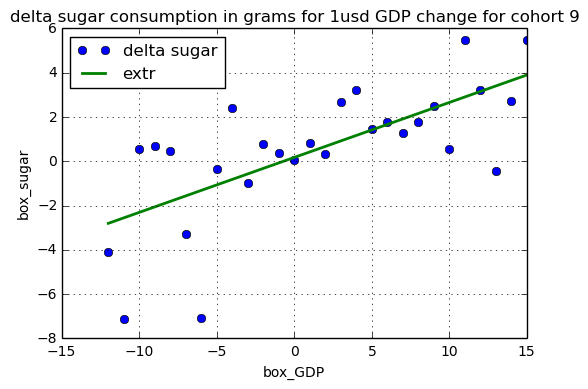

In [143]:
tmp = grouped_by_box_sugar.agg({'delta sugar': pd.Series.mean,
                               'delta GDP':pd.Series.mean})[-12:15]
l = tmp.index.tolist()
p = np.poly1d(np.polyfit(l,tmp['delta sugar'],1))
r=[]
for i in l:
    r.append(p(i))
tmp['extr'] = r

tmp[['delta sugar', 'extr']].plot(style=['o','-'])
plt.title('delta sugar consumption in grams for 1usd GDP change for cohort 9')
plt.ylabel('box_sugar');


Well, here I chose the simplest curve to fit -- linear. It doesnot fit nice, but there is a definite trend near the extrapolation line.
One can play around trying other fitting curves.


Now we will construct the probability distribution for changing sugar consumption per 1USD GDP change.
That is how probable that by increasing `GDP` by 1USD the average sugar consumption increase/decrease in `x` gramm.

Here I cut off extreme values  ``>.5`` and ``<-.5``, since

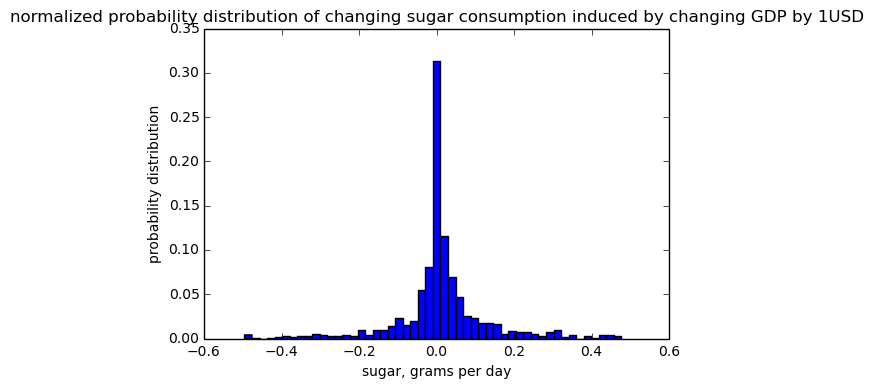

In [144]:
raw = df['delta_sugar_per_delta_1usd']
origin_len = len(raw)
raw = raw[(raw >-.5)]
raw = raw[(raw <.5)] #.sort()#.hist(bins=200)
#raw = raw
raw.sort(ascending=False)
#raw = raw.reset_index()
#raw['index']
#http://stackoverflow.com/questions/3866520/plotting-histograms-whose-bar-heights-sum-to-1-in-matplotlib
weights = np.ones_like(raw)/len(raw)
counts, bins, patches = plt.hist(raw, bins=50,weights=weights)

#raw.hist(bins=50, weights=weights)
plt.title('normalized probability distribution of changing sugar consumption induced by changing GDP by 1USD')
plt.xlabel('sugar, grams per day');
plt.ylabel('probability distribution')

In [145]:
sum(counts)

1.0000000000000131

This probability function is normalized to unity. i.e. sum of all counts is 1.

The shape of the histogram tells us, that:
 1. increase in GDP can lead to sugar consumption increase
 2. increase in GDP can lead to sugar consumption decrease
 3. decrease in GDP can lead to increase of sugar consumption
 4. decrease in GDP can lead to increase of sugar consumption
 5. the most probable is that change in GDP does not lead to sugar consumption change.


Our goal, however, is to figure out is there a *positive* correlation between GDP and sugar consumption. So we filter those cases then positive change in GDP leads to positive change in sugar consumption.


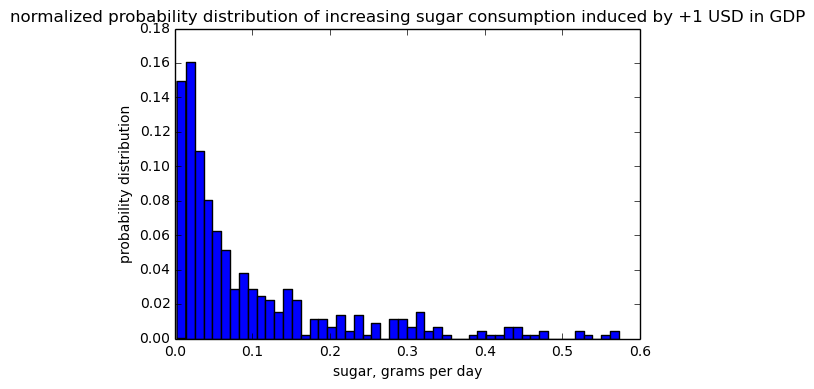

In [146]:
df_positive_delta_GDP = df[df['delta GDP']>0]

grouped_by_box_sugar_1 = df_positive_delta_GDP.sort('box_GDP').groupby(['box_GDP'])
grouped_by_box_sugar_1.head()

raw = df['delta_sugar_per_delta_1usd']
raw = raw[(raw >0.0)]
raw = raw[(raw <.6)] #.sort()#.hist(bins=200)
raw.sort(ascending=False)

#raw = raw.reset_index()
#raw['index']
#http://stackoverflow.com/questions/3866520/plotting-histograms-whose-bar-heights-sum-to-1-in-matplotlib
weights = np.ones_like(raw)/len(raw)
counts, bins, patches = plt.hist(raw, bins=50,weights=weights)

#raw.hist(bins=50, weights=weights)
plt.title('normalized probability distribution of increasing sugar consumption induced by +1 USD in GDP')
plt.xlabel('sugar, grams per day');
plt.ylabel('probability distribution')




Now we can come back to the Figure intitled "normalized by the 1961, sugar by cohorts".
I  reproduced it below for convinience.

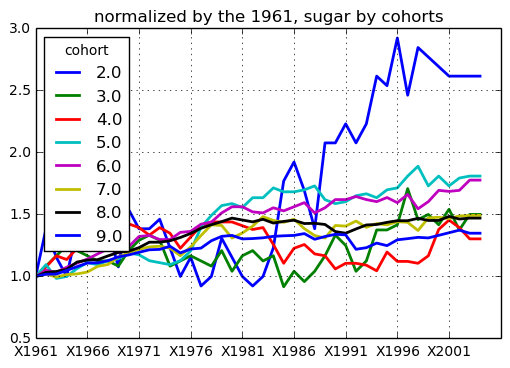

In [147]:
mean_grouped_by_cohort.divide(X1961, axis=0).T.plot()
plt.title('normalized by the 1961, sugar by cohorts')


Lets extract the points for cohort 2 for the period ``1986-2004``.


In [148]:
sugar_cohort2_1986_1996 = mean_grouped_by_cohort.loc[2]['X1986':'X2004']
sugar_cohort2_1986_1996
# grouped_by_cohort.Country.groups[9]

X1986    17.125
X1987    15.070
X1988    12.330
X1989    18.495
X1990    18.495
X1991    19.865
X1992    18.495
X1993    19.865
X1994    23.290
X1995    22.605
X1996    26.030
X1997    21.920
X1998    25.345
X1999    24.660
X2000    23.975
X2001    23.290
X2002    23.290
X2003    23.290
X2004    23.290
Name: 2.0, dtype: float64

In [149]:
gdp_2_1986_2004 = GDP_2['X1986':'X2004'].T.mean()#.plot()
gdp_2_1986_2004


X1986    257.347435
X1987    251.336004
X1988    259.894193
X1989    261.041088
X1990    255.547628
X1991    256.146915
X1992    259.061262
X1993    246.541506
X1994    248.031220
X1995    249.983465
X1996    252.712379
X1997    260.506100
X1998    266.734930
X1999    270.442035
X2000    271.957463
X2001    283.397710
X2002    290.431117
X2003    298.152746
X2004    313.365967
dtype: float64

In [150]:
test_statistic = pd.DataFrame([sugar_cohort2_1986_1996, gdp_2_1986_2004]).T
#test_statistic['GDP'] = gdp_2_1986_2004
test_statistic.rename(columns={2.0:'sugars','Unnamed 0':'GDP' }, inplace=True)
#sugar.rename(columns = {"NA.":"Country"}, inplace = True)
test_statistic

,sugars,GDP
X1986,17.125,257.347435
X1987,15.070,251.336004
X1988,12.330,259.894193
X1989,18.495,261.041088
X1990,18.495,255.547628
X1991,19.865,256.146915
X1992,18.495,259.061262
X1993,19.865,246.541506
X1994,23.290,248.031220
X1995,22.605,249.983465


In [151]:
# calculate differences
diffs = test_statistic.diff()
#rename  columns
diffs.rename(columns={'sugars':'delta sugars',
                     'GDP':"delta GDP"}, inplace=True)
# select only those, which have positive delta GDP accompanied by 
# positive delta sugars
diffs = diffs[(diffs['delta GDP']>=0.0) & (diffs['delta sugars']>=0.0)]
diffs['diff_sugars_per_1USD'] = diffs['delta sugars']/diffs['delta GDP']
diffs

#test_statistics

,delta sugars,delta GDP,diff_sugars_per_1USD
X1989,6.165,1.146895,5.375381
X1991,1.370,0.599287,2.286050
X1994,3.425,1.489713,2.299100
X1996,3.425,2.728914,1.255078
X1998,3.425,6.228830,0.549862
X2002,0.000,7.033407,0.000000
X2003,0.000,7.721629,0.000000
X2004,0.000,15.213221,0.000000


The data from the *diff_sugars_per_1USD* from the table above we will test against our probability distribution.


In [152]:
test_statistics = diffs['diff_sugars_per_1USD']
test_statistics

X1989    5.375381
X1991    2.286050
X1994    2.299100
X1996    1.255078
X1998    0.549862
X2002    0.000000
X2003    0.000000
X2004    0.000000
Name: diff_sugars_per_1USD, dtype: float64

For each year we will calculate the probability to increase sugar consumption at least as much as stated in the *test_statistics* column. 

In [153]:
counts,bins


(array([ 0.14922049,  0.16035635,  0.1091314 ,  0.08017817,  0.0623608 ,
         0.05122494,  0.02895323,  0.03786192,  0.02895323,  0.02449889,
         0.02227171,  0.0155902 ,  0.02895323,  0.02227171,  0.00222717,
         0.01113586,  0.01113586,  0.00668151,  0.01336303,  0.00445434,
         0.01336303,  0.00222717,  0.00890869,  0.        ,  0.01113586,
         0.01113586,  0.00668151,  0.0155902 ,  0.00445434,  0.00668151,
         0.00222717,  0.        ,  0.        ,  0.00222717,  0.00445434,
         0.00222717,  0.00222717,  0.00668151,  0.00668151,  0.00222717,
         0.00222717,  0.00445434,  0.        ,  0.        ,  0.        ,
         0.00445434,  0.00222717,  0.        ,  0.00222717,  0.00445434]),
 array([ 0.00276035,  0.01416298,  0.02556561,  0.03696824,  0.04837087,
         0.0597735 ,  0.07117613,  0.08257876,  0.09398139,  0.10538402,
         0.11678665,  0.12818928,  0.13959191,  0.15099454,  0.16239717,
         0.1737998 ,  0.18520243,  0.19660506,  0

In [154]:
probabilities = []
for val in test_statistics:
    pos = None
    for bin in bins:
        if val < bin: 
            pos= np.where(bins==bin)[0][0];
            break
    if pos !=None:
        probabilities.append(sum(counts[pos:]))
    else:
        probabilities.append(0)
probabilities

[0,
 0,
 0,
 0,
 0.0066815144766145806,
 0.99999999999999234,
 0.99999999999999234,
 0.99999999999999234]

In [155]:
diffs['probabilities'] = probabilities
#setting up pi value as 5%
diffs['pi value'] = .05
diffs['conclusion'] = diffs['probabilities']>diffs['pi value']
diffs

,delta sugars,delta GDP,diff_sugars_per_1USD,probabilities,pi value,conclusion
X1989,6.165,1.146895,5.375381,0.000000,0.05,False
X1991,1.370,0.599287,2.286050,0.000000,0.05,False
X1994,3.425,1.489713,2.299100,0.000000,0.05,False
X1996,3.425,2.728914,1.255078,0.000000,0.05,False
X1998,3.425,6.228830,0.549862,0.006682,0.05,False
X2002,0.000,7.033407,0.000000,1.000000,0.05,True
X2003,0.000,7.721629,0.000000,1.000000,0.05,True
X2004,0.000,15.213221,0.000000,1.000000,0.05,True


# The conclusion, based on the data used is:

The sugar consumption data for cohort 2 countries can be explained for the 
year 2002, 2003 and 2004.
For the rest of years in the table above the null hypothesis is true.

Surely, some other results could be obtained (having more time), if to use more than a single cohort 9 to accumulate statistics. Doing so the histrogram could be perhaps broader or of a bit different shape. 
